### Introduction to Scientific Python
# LIF Neuron Exercise

*Please execute the cell bellow in order to initialize the notebook environment*

In [1]:
# show figures inline and do not autosave notebook
%matplotlib inline
%autosave 0

import matplotlib.pyplot as plt    # import matplotlib
import numpy as np
import math                        # import basic math functions
import random                      # import basic random number generator functions
from __future__ import division    # enable division by integers

Autosave disabled


## Leaky Integrate-and-Fire Neuron

In this notebook we'll implement a *Leaky Integrate-and-Fire (LIF)* neuron with stochastic pre-synaptic input current(s) and extract and visualize its key statistical quantities.

This neuron model is defined by the *membrane equation* and *reset condition*:
\begin{align}
&\tau_m\,\frac{d}{dt}\,V(t) = E_{L} - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th}\\
\\
\\
&V(t) = V_{r} &\text{otherwise}\\
\\
\end{align}
where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_{L}$ is the leak potential, $I(t)$ is the pre-synaptic input current, $V_{th}$ is the firing threshold and $V_{r}$ is the reset voltage.

We'll extract and visualize the mean, variance and histogram of the following quantities:

* Pre-synaptic input current(s) $I(t)$
* Membrane potential $V(t)$
* Output firing frequency $\lambda$

The problem will be split in several steps:

* ODE integration without spikes
* Stochastic pre-synaptic input
* Ensemble statistics
* Output spikes

**EXERCISE 1**

Initialize the main simulation variables.

**INSTRUCTIONS**
* Modify the code below to print the main simulation parameters

In [2]:
# t_max = 150e-3   # second
# dt = 1e-3        # second
# tau = 20e-3      # second
# el = -60e-3      # milivolt
# vr = -70e-3      # milivolt
# vth = -50e-3     # milivolt
# r = 100e6        # ohm
# i_mean = 25e-11  # ampere

# print t_max, dt, tau, el, vr, vth, r, i_mean

In [3]:
# exercise 1

In [2]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print t_max, dt, tau, el, vr, vth, r, i_mean

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


**EXPECTED OUTPUT**

### ODE integration without spikes

The numerical integration of the membrane equation can be performed in discrete or in continuous time. We'll start with discrete time integration by writting the membrane equation without taking the limit $\Delta t \to 0$ in the definition of $d/dt\,V(t)$:


\begin{align*}
\tau_m\,\frac{V\left(t+\Delta t\right)-V\left(t\right)}{\Delta t} &= E_{L} - V(t) + R\,I(t)
\end{align*}


The value of membrane potential $V\left(t+\Delta t\right)$ can be expressed in terms of its previous value $V(t)$ by simple algebraic manipulation. For *small enough* values of $\Delta t$ this provides a good approximation of the continuous time integration.

**EXERCISE 2**

Compute the values of $V(t)$ between $t=0$ and $t=0.01$ with $V(0)=E_L$ and pre-synaptic input given by:

$$
I(t)=I_{mean}\left(1+\sin\left(\frac{2 \pi}{0.01}\,t\right)\right)
$$

**INSTRUCTIONS**
* Express $V\left(t+\Delta t\right)$ in terms of $V(t)$
* Initialize the membrane potential variable `v` to $E_L$
* Loop in the time variable `t` from `t=0` to `t=0.01` with time step `dt`
* At each time step
    * Compute the current value of `i`
    * Update the value of `v`
    * Print `v`
* Use `math.pi` and `math.sin` for $\pi$ and $\sin(\,)$ respectively

In [4]:
# exercise 2

In [3]:
t, v, tend = 0, el, 0.01
while t <= 0.01:
    i = i_mean * (1 + math.sin(2*math.pi / 0.01 * t))
    v += dt * (el - v + r * i) / tau
    t += dt
    print v

-0.05875
-0.0568277684346
-0.0545475593675
-0.0523813607538
-0.0507775611507
-0.0499886830932
-0.0499739805039
-0.0504141021241
-0.0508322176632
-0.0507753383454


**EXPECTED OUTPUT**

**EXERCISE 3**

Plot the values of $V(t)$ between $t=0$ and $t=t_{max}$ under the same conditions.

**INSTRUCTIONS**
* Update end time of loop
* Replace printing command with plotting command (with keyword `'ko'`)

In [5]:
# exercise 3

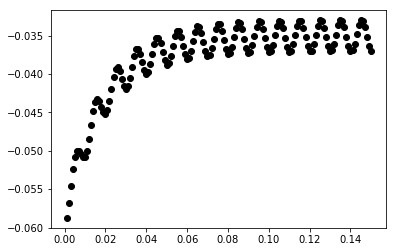

In [4]:
t, v, tend = 0, el, t_max
while t <= tend:
    i = i_mean * (1 + math.sin(2*math.pi / 0.01 * t))
    v += dt * (el - v + r * i) / tau
    t += dt
    plt.plot(t, v, "ko")

**EXPECTED OUTPUT**
<img src="fig/lif_3.png">

## Stochastic pre-synaptic input

The pre-synaptic input received by neurons is random in nature. We'll replace the sinusoidal input from the previous exercise with a random input with similar statistical properties:

\begin{align}
I(t)=I_{mean}\left(1+0.1\sqrt{\frac{t_{max}}{\Delta t}}\,\xi(t)\right)\qquad\text{with }\xi(t)\sim U(-1,1)
\end{align}

A random pre-synaptic input results in a random time course $V(t)$ for each execution.

**EXERCISE 4**

Plot the values of $V(t)$ between $t=0$ and $t=t_{max}$ with random input $I(t)=I_{mean}\left(1+0.1\sqrt{\frac{t_{max}}{\Delta t}}\,\xi(t)\right)$ with $\xi(t)\sim U(-1,1)$.

The function `random.seed()` initializes the random number generator and `random.random()` generates a sample between `0` and `1`.

**INSTRUCTIONS**
* Initializes the random number generator
* Use the function `random.random()` to generate the input at each timestep
* Repeat the execution several times to verify that $V(t)$ has a random time course

In [6]:
# exercise 4

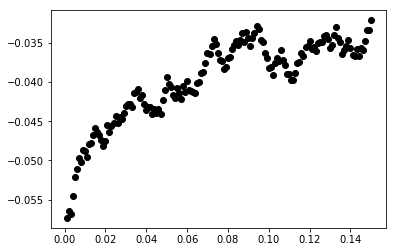

In [5]:
random.seed(1234)
t, v, tend = 0, el, t_max
while t <= t_max:
    xi = 2 * random.random() - 1
    i = i_mean * (1 + 0.1 * math.sqrt(t_max / dt) * xi)
    v += dt * (el - v + r * i) / tau
    t += dt
    plt.plot(t, v, "ko")

**EXPECTED OUTPUT**
<img src="fig/lif_4.png">

## Ensemble statistics

Multiple runs of the previous exercise may give the impression of periodic regularity in the evolution of $V(t)$. We'll collect the sample mean over $N$ realizations of $V(t)$  with random input in order to test such hypothesis. The sample mean, sample variance and sample autocovariance at times $\left\{t_k, t_j\right\}\in[0,t_{max}]$ and for $N$ realizations of $V(t)$ are given by:

\begin{align}
\left\langle V(t_k)\right\rangle &= \frac{1}{N}\sum_{n=1}^N V(t_k)_n & & \text{sample mean}\\
\left\langle (V(t_k)-\left\langle V(t_k)\right\rangle)^2\right\rangle &= \frac{1}{N-1} \sum_{n=1}^N \left(V(t_k)_n-\left\langle V(t_k)\right\rangle\right)^2 & & \text{sample variance} \\
\left\langle \left(V(t_k)-\left\langle V(t_k)\right\rangle\right)\left(V(t_j)-\left\langle V(t_j)\right\rangle\right)\right\rangle
&= \frac{1}{N-1} \sum_{n=1}^N \left(V(t_k)_n-\left\langle V(t_k)\right\rangle\right)\left(V(t_j)_n-\left\langle V(t_j)\right\rangle\right) & & \text{sample autocovariance}
\end{align}

**EXERCISE 5**

Visualize `N=50` realizations.

**INSTRUCTIONS**
* At each timestep loop over `N` realizations of random input
* Plot each realization with keyword `'co'` and parameter `alpha=0.1`

In [7]:
# exercise 5

In [10]:
n = 50

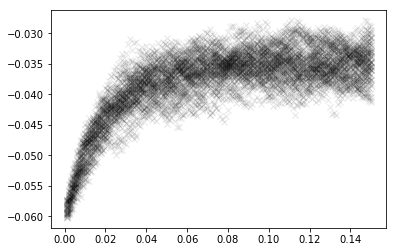

In [11]:
t, tend, v = 0, t_max, n * [el] 

while t <= tend:
    v_mean = 0
    for j in range(n):
        xi = 2 * random.random() - 1
        i = i_mean * (1 +  0.1 * math.sqrt(t_max / dt) * xi)
        v[j] += dt * (el - v[j] + r * i) / tau
        v_mean += v[j]
    v_mean /= n    
    t += dt
    plt.plot(n * [t], v, "kx", alpha = 0.1)

**EXPECTED OUTPUT**
<img src="fig/lif_5.png">

**EXERCISE 6**

Plot the sample mean $\left\langle V(t)\right\rangle$ over `N=50` realizations.

**INSTRUCTIONS**
* Plot the sample mean at each timestep with keyword `'ko'`

In [8]:
# exercise 6

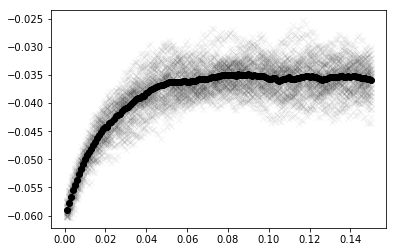

In [12]:
t, tend, v = 0, t_max, n * [el] 

while t <= tend:
    v_mean = 0
    for j in range(n):
        xi = 2 * random.random() - 1
        i = i_mean * (1 +  0.1 * math.sqrt(t_max / dt) * xi)
        v[j] += dt * (el - v[j] + r * i) / tau
        v_mean += v[j]
    v_mean /= n    
    t += dt
    plt.plot(n * [t], v, "kx", alpha = 0.05)
    plt.plot(t, v_mean, "ko")

**EXPECTED OUTPUT**
<img src="fig/lif_6.png">

**EXERCISE 7**

Add sample variance $\text{Var}\left(t_k\right)$ to the plot.

**INSTRUCTIONS**
* After collecting the sample mean, iterate a second time to compute the sample variance
* Plot the sample variance with keyword `'ko'` and parameter `alpha=0.5`.

In [9]:
# exercise 7

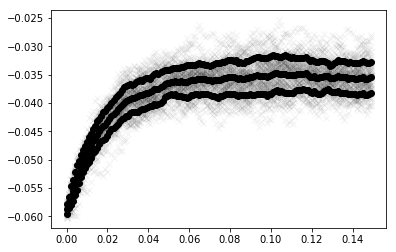

In [14]:
t, tend, v = 0, t_max, n * [el] 

while t <= tend:
    v_mean = v_std = 0
    for j in range(n):
        xi = 2 * random.random() - 1
        i = i_mean * (1 +  0.1 * math.sqrt(t_max / dt) * xi)
        v[j] += dt * (el - v[j] + r * i) / tau
        v_mean += v[j]
    v_mean /= n
    for j in range(n):
        v_std += (v[j] - v_mean)**2
    v_std = math.sqrt(v_std / (n - 1))
    plt.plot(n * [t], v, "kx", alpha = 0.05)
    plt.plot(t, v_mean, "ko")
    plt.plot(t, v_mean + v_std, "ko")
    plt.plot(t, v_mean - v_std, "ko")
    t += dt

**EXPECTED OUTPUT**
<img src="fig/lif_7.png">

Another important statistic is the sample histogram that for time $t_k\in[0,t_{max}]$ gives the distribution of $V(t_k)$ values. The sample histogram with $J$ bins for $N$ realizations of $V\left(t_k\right)$ is given by:
 
\begin{align}
N = \sum_{j=1}^{J} m_j
\end{align}

where $m_j$ is a function that counts the number of samples $V\left(t_k\right)$ that fall into bin $j$.

**EXERCISE 8**

Plot an histogram of $J=50$ bins of $V(t)$ for $t=t_{max}/10$ and $t=t_{max}$ for $N=10000$ realizations.

The function `plt.hist(data, nbins)` plots an histogram of `nbins` bins of the list 'data' and returns the lists `pdf`, `bins`, `patches`.

`pdf, bins, patches = plt.hist(data, bins)`

The parameters `histtype='stepfilled'` and `linewidth=0` add improve the reading of the histograms. 

**INSTRUCTIONS**
* Plot the 1st histogram after running up to $t=t_{max}/10$
* Plot the 2nd histogram at $t=t_{max}$
* Add labels to identify the time of each histogram

In [10]:
# exercise 8

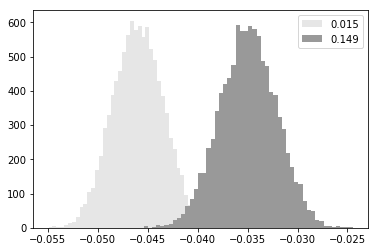

In [44]:
n = 10000
t, tend, v = 0, t_max, n * [el] 

while t <= tend:
    for j in range(n):
        xi = 2 * random.random() - 1
        i = i_mean * (1 +  0.1 * math.sqrt(t_max / dt) * xi)
        v[j] += dt * (el - v[j] + r * i) / tau
    if abs(t - t_max / 10) < dt / 2:
        plt.hist(v, 50, histtype = "stepfilled", color = "0.9", label = str(t))
    elif abs(t - t_max) < dt:
        plt.hist(v, 50, histtype = "stepfilled", color = "0.6", label = str(t))
    t += dt
        
plt.legend()

**EXPECTED OUTPUT**
<img src="fig/lif_8.png">

## Output Spikes

The last step is to introduce the reset condition:
This neuron model is defined by the *membrane equation* and *reset condition*:

\begin{align}
V(t) &= V_{r} &\text{if }\quad V(t)\geq V_{th}
\end{align}

**EXERCISE 9**

Insert the reset condition and collect the spike times of each realization in a dictionary variable `spikes`.

**INSTRUCTIONS**
* Reset $V(t)$ to $V_r$ if $V(t)\geq V_{th}$ and collect the spike time
* Plot each realization with keyword `'co'` and parameter `alpha=0.05`
* Plot the sample mean with keyword `'ko'`
* Create a new figure and plot the spike times with keyword `'k|'`

In [11]:
# exercise 9

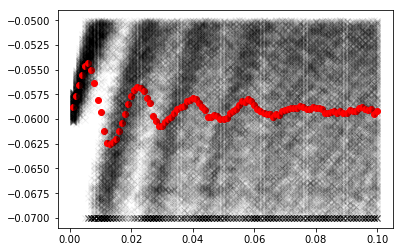

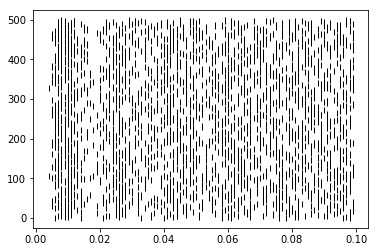

In [54]:
n = 500
spikes = {"t":[], "neuron": []}

t, tend, v = 0, t_max, n * [el] 

while t <= 0.1:
    v_mean = 0
    for j in range(n):
        xi = 2 * random.random() - 1
        i = i_mean * (1 +  0.1 * math.sqrt(t_max / dt) * xi)
        v[j] += dt * (el - v[j] + r * i) / tau
        if v[j] > vth:
            v[j] = vr
            spikes["t"].append(t)
            spikes["neuron"].append(j)
        v_mean += v[j]
    v_mean /= n    
    t += dt
    plt.plot(n * [t], v, "kx", alpha = 0.05)
    plt.plot(t, v_mean, "ro")

plt.figure()
plt.plot(spikes["t"], spikes["neuron"], "k|")

**EXPECTED OUTPUT**
<img src="fig/lif_9a.png">
<img src="fig/lif_9b.png">

**EXERCISE 10**

Investigate the effect of refractory period $t_{ref}$ on the evolution of output rate $\lambda(t)$.

**INSTRUCTIONS**
* Add refractory period $t_{ref}=10$ ms after each spike, during which $V(t)$ is clamped to $V_r$
* Experiment increasingly higher values of refractory period $t_{ref}$

In [12]:
# exercise 10

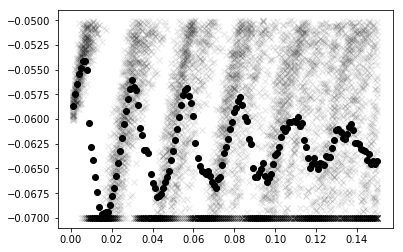

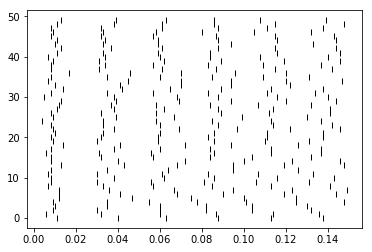

In [50]:
n = 50
t, tend, v = 0, t_max, n * [el]
spikes = {"t":[], "neuron": []}
tref = 1e-2
tspike = n * [-tref]

while t <= tend:
    v_mean = 0
    for j in range(n):
        xi = 2 * random.random() - 1
        i = i_mean * (1 +  0.1 * math.sqrt(t_max / dt) * xi)
        if t - tspike[j] >= tref:
            v[j] += dt * (el - v[j] + r * i) / tau
        
        if v[j] > vth:
            v[j] = vr
            tspike[j] = t
            spikes["t"].append(t)
            spikes["neuron"].append(j)
        v_mean += v[j]
    v_mean /= n    
    t += dt
    plt.plot(n * [t], v, "kx", alpha = 0.1)
    plt.plot(t, v_mean, "ko")

plt.figure()
plt.plot(spikes["t"], spikes["neuron"], "k|")

**EXPECTED OUTPUT**
<img src="fig/lif_10a.png">
<img src="fig/lif_10b.png">

**EXERCISE 11**

Below is a proposed implementation for Exercise 7 from above. Rewrite this code, but break it up into functions. Specifically, write and use function to:
* `I(n)`: returns the current, $I(t)$, at a given time $t$, a list of $n$ floats
* `mean(x)`: returns the mean of `x`, a list of floats
* `std(x)`: returns the standard deviation of `x`, a list of floats
* `ode_step(v, i)`: returns the voltage at the next time step, $V(t+\Delta t)$, given the voltage at the current time step, $V(t)$, and the current, $I(t)$, all lists of floats

In [13]:
# exercise 11

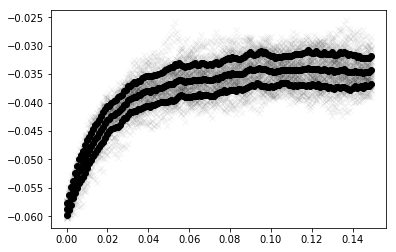

In [205]:
def I(n):
    return [i_mean * (1 +  0.1 * math.sqrt(t_max / dt) * (2 * random.random() - 1)) for i in range(n)]
    
def mean(x):
    return sum(xx for xx in x) / len(x)
    
def std(x):
    x_mean = mean(x)
    return math.sqrt(sum((xx - x_mean)**2 for xx in x) / len(x))
    
def ode_step(v, t):
    n = len(v)
    i = I(n)
    for j in range(n):
            v[j] += dt * (el - v[j] + r * i[j]) / tau
    return v

n, t, tend, v = 50, 0, t_max, n * [el]

while t <= t_max:
    v = ode_step(v, t)
    plt.plot(n * [t], v, "kx", alpha = 0.05)
    v_mean = mean(v)
    v_std = std(v)
    plt.plot(t, v_mean , "ko")
    plt.plot(t, v_mean + v_std, "ko")
    plt.plot(t, v_mean - v_std, "ko")
    t += dt

**EXPECTED OUTPUT**
<img src="fig/lif_11.png">

**EXERCISE 12**

Rewrite the code from Exercise 11, but now use the tools from NumPy. For example:
* Use `np.array` instead of Python list for voltage, $V(t)$, and time, $t$
* Use the NumPy functions for statistical function, (e.g. `np.mean`) and mathematical (e.g. `np.sqrt`) operations
* Plot mean $\pm$ std with ```plt.fill_between``` in red with ```alpha=0.6```

In [14]:
# exercise 12

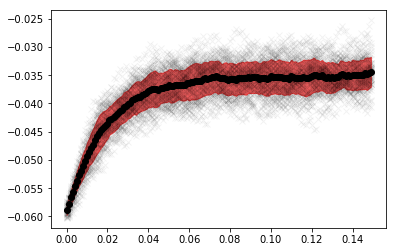

In [211]:
n, t, tend, v = 50, 0, t_max, el * np.ones(n)
v_mean, v_std, time = [], [], []

while t <= t_max:
    v = ode_step(v, t)
    plt.plot(n * [t], v, "kx", alpha = 0.05)
    v_mean.append(np.mean(v))
    v_std.append(np.std(v))
    time.append(t)
    t += dt

plt.plot(time, v_mean , "ko")
up, low = np.add(v_mean, v_std), np.subtract(v_mean, v_std)
plt.fill_between(time, low, up, color = "red", alpha = 0.6)

**EXPECTED OUTPUT**
<img src="fig/lif_12.png">

**EXERCISE 13**

**Stretch exercise: this problem is open-ended and will take some extra thought on your part**

Extend your solution from Exercise 9 to model a simple network. In Exercise 9 you modeled an ensemble of spiking neurons that evolved independently of each other. The only step you need to turn this into a network is to allow spikes from one neuron to influece the voltage of other neurons. One simple way of achieve this provide a "kick" to the voltage of "post-synaptic" neurons whenever a "post-synaptic" neuron spikes. The size of this kick represent the strength of the synapses between the neurons. Remember to include both positive and negative "synapses" so that your network activity does not explode!